In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of Single/Multi Branch Architectures

S-GRU 7: 0.1705362 30: 0.256333 60: 0.09126554 90: 0.10401182
S-LSTM 7: 0.112389676 30: 0.11154112 60: 0.09218127 90: 0.11344896
M-GRU 7: 0.8980263 30: 0.7553696 60: 0.74698 90: 0.7771503
M-LSTM 7: 0.6239622 30: 0.7930938 60: 0.6341479 90: 1.1981019
FNN 7: 0.09765822 30: 0.106002524 60: 0.14097337 90: 0.116267115


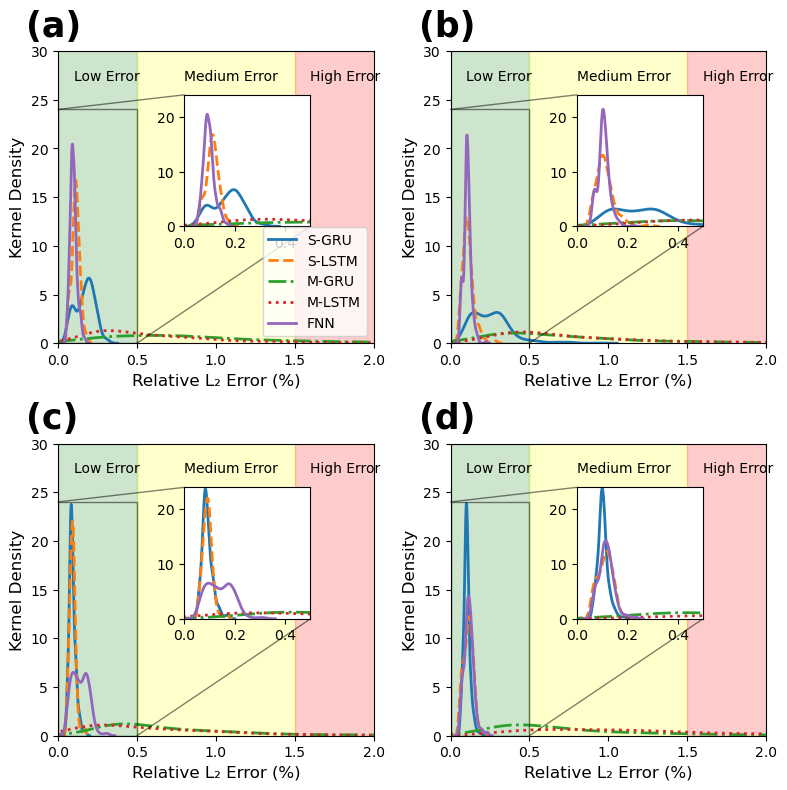

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data directories
sdata_dir = 'analysis/baseline/single_branch/array/'
mdata_dir = 'analysis/baseline/multi_branch/array/'

# Load single-branch GRU/LSTM results
sgru_7 = np.load(sdata_dir + 'gru_window_7_preds_targets.npy')
sgru_30 = np.load(sdata_dir + 'gru_window_30_preds_targets.npy')
sgru_60 = np.load(sdata_dir + 'gru_window_60_preds_targets.npy')
sgru_90 = np.load(sdata_dir + 'gru_window_90_preds_targets.npy')

slstm_7 = np.load(sdata_dir + 'lstm_window_7_preds_targets.npy')
slstm_30 = np.load(sdata_dir + 'lstm_window_30_preds_targets.npy')
slstm_60 = np.load(sdata_dir + 'lstm_window_60_preds_targets.npy')
slstm_90 = np.load(sdata_dir + 'lstm_window_90_preds_targets.npy')

fnn_7 = np.load(sdata_dir + 'fnn_window_7_preds_targets.npy')
fnn_30 = np.load(sdata_dir + 'fnn_window_30_preds_targets.npy')
fnn_60 = np.load(sdata_dir + 'fnn_window_60_preds_targets.npy')
fnn_90 = np.load(sdata_dir + 'fnn_window_90_preds_targets.npy')

# Load multi-branch GRU/LSTM results
mgru_7 = np.load(mdata_dir + 'gru_window_7_preds_targets.npy')
mgru_30 = np.load(mdata_dir + 'gru_window_30_preds_targets.npy')
mgru_60 = np.load(mdata_dir + 'gru_window_60_preds_targets.npy')
mgru_90 = np.load(mdata_dir + 'gru_window_90_preds_targets.npy')

mlstm_7 = np.load(mdata_dir + 'lstm_window_7_preds_targets.npy')
mlstm_30 = np.load(mdata_dir + 'lstm_window_30_preds_targets.npy')
mlstm_60 = np.load(mdata_dir + 'lstm_window_60_preds_targets.npy')
mlstm_90 = np.load(mdata_dir + 'lstm_window_90_preds_targets.npy')

# compute relative l2 error per sample (samples, (pred, target), grid points)
def relative_l2_error(data):
    preds = data[:, 0, :]
    targets = data[:, 1, :]
    l2_errors = np.linalg.norm(preds - targets, axis=1)
    target_norms = np.linalg.norm(targets, axis=1)
    relative_errors = l2_errors / target_norms * 100
    return relative_errors

# get relative errors for all models
sgru_7_err = relative_l2_error(sgru_7)
sgru_30_err = relative_l2_error(sgru_30)
sgru_60_err = relative_l2_error(sgru_60)
sgru_90_err = relative_l2_error(sgru_90)

slstm_7_err = relative_l2_error(slstm_7)
slstm_30_err = relative_l2_error(slstm_30)
slstm_60_err = relative_l2_error(slstm_60)
slstm_90_err = relative_l2_error(slstm_90)

fnn_7_err = relative_l2_error(fnn_7)
fnn_30_err = relative_l2_error(fnn_30)
fnn_60_err = relative_l2_error(fnn_60)
fnn_90_err = relative_l2_error(fnn_90)

mgru_7_err = relative_l2_error(mgru_7)
mgru_30_err = relative_l2_error(mgru_30)
mgru_60_err = relative_l2_error(mgru_60)
mgru_90_err = relative_l2_error(mgru_90)

mlstm_7_err = relative_l2_error(mlstm_7)
mlstm_30_err = relative_l2_error(mlstm_30)
mlstm_60_err = relative_l2_error(mlstm_60)
mlstm_90_err = relative_l2_error(mlstm_90)

# print
print("S-GRU 7:", np.mean(sgru_7_err), "30:", np.mean(sgru_30_err), "60:", np.mean(sgru_60_err), "90:", np.mean(sgru_90_err))
print("S-LSTM 7:", np.mean(slstm_7_err), "30:", np.mean(slstm_30_err), "60:", np.mean(slstm_60_err), "90:", np.mean(slstm_90_err))
print("M-GRU 7:", np.mean(mgru_7_err), "30:", np.mean(mgru_30_err), "60:", np.mean(mgru_60_err), "90:", np.mean(mgru_90_err))
print("M-LSTM 7:", np.mean(mlstm_7_err), "30:", np.mean(mlstm_30_err), "60:", np.mean(mlstm_60_err), "90:", np.mean(mlstm_90_err))
print("FNN 7:", np.mean(fnn_7_err), "30:", np.mean(fnn_30_err), "60:", np.mean(fnn_60_err), "90:", np.mean(fnn_90_err))

#----
# Sequence labels
sequence_labels = ["(a)", "(b)", "(c)", "(d)"]

# Line styles for each model
line_styles = ["-", "--", "-.", ":", "-"]

# Model names
model_labels = ["S-GRU", "S-LSTM", "M-GRU", "M-LSTM", "FNN"]

# Corresponding sequence lengths
sequence_lengths = [7, 30, 60, 90]


# Extracted L₂ error for each sequence length
data_list = [[sgru_7_err, slstm_7_err, mgru_7_err, mlstm_7_err, fnn_7_err],
             [sgru_30_err, slstm_30_err, mgru_30_err, mlstm_30_err, fnn_30_err],
             [sgru_60_err, slstm_60_err, mgru_60_err, mlstm_60_err, fnn_60_err],
             [sgru_90_err, slstm_90_err, mgru_90_err, mlstm_90_err, fnn_90_err]]

# Create 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Loop through each panel to plot L₂ Error for different sequence lengths
for i, ax in enumerate(ax.flat):
    for data, label, ls in zip(data_list[i], model_labels, line_styles):
        sns.kdeplot(data, ax=ax, label=label, linestyle=ls, linewidth=2)

    ax.set_xlabel("Relative L₂ Error (%)", fontsize=12)
    ax.set_ylabel("Kernel Density", fontsize=12)
    ax.set_xlim([0, 2])  # Limit x-axis to 0-25
    ax.set_ylim([0, 30])  # Limit y-axis to 0-3

    ax.text(-0.1, 1.05, sequence_labels[i], transform=ax.transAxes, 
            fontsize=25, fontweight='bold')  # Panel label (a, b, c, d)
    
    # Only show legend in the first panel (a)
    if i == 0:
        ax.legend(fontsize=10, loc='lower right')
    else:
        ax.legend().set_visible(False)


    # Define zoom-in region
    x_zoom_min, x_zoom_max = 0, 0.5  # Region of interest for zooming

    # Adding zoomed-in inset (all models)
    axins = ax.inset_axes([0.4, 0.4, 0.4, 0.45])  # x, y, width, height
    for data, label, ls in zip(data_list[i], model_labels, line_styles):
        sns.kdeplot(data, ax=axins, label=label, linestyle=ls, linewidth=2)

    axins.set_xlim(x_zoom_min, x_zoom_max)  # Limit x-axis
    axins.set_ylim(0, 24)  # Limit y-axis
    axins.set_ylabel("")

    
    # Connect zoomed-in region to main plot
    ax.indicate_inset_zoom(axins, edgecolor="black")

    # Add shaded regions to indicate low, medium, and high error areas
    ax.axvspan(0, 0.5, color='green', alpha=0.2, label='Low Error')  # Low error zone
    ax.axvspan(0.5, 1.5, color='yellow', alpha=0.2, label='Medium Error')  # Medium error
    ax.axvspan(1.5, 2.5, color='red', alpha=0.2, label='High Error')  # High error

    # Add labels for error zones
    ax.text(0.10, 27, 'Low Error', color='black', fontsize=10)
    ax.text(0.80, 27, 'Medium Error', color='black', fontsize=10)
    ax.text(1.60, 27, 'High Error', color='black', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Analysis of Field Output

In [3]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap

In [4]:
# load the preds & targets obtaned from single lstm branch with 30 squential length
data = np.load('single_branch/array/fnn_window_90_preds_targets.npy')
preds = data[:,0]
targets = data[:,1]

save_path = 'figures/'
# for predictions
model = 'gru'
file_f = save_path + model + 'predictions.png'
file_e = save_path + model + 'errors.png'

In [5]:
# compute the l2 error
l2 = []
for i in range(len(preds)):
    preds[i] = np.array(preds[i])
    targets[i] = np.array(targets[i])
    l2_error = np.linalg.norm(preds[i] - targets[i], 2)
    l2.append(l2_error)
    
l2 = np.array(l2)

# create a pandas dataframe
df = pd.DataFrame({'L2 Error': l2})

# Find indices for best, 90th percentile, and worst cases
#best_idx = np.argmin(l2)  # Minimum L2 error
#worst_idx = np.argmax(l2)  # Maximum L2 error
p95_idx = np.argsort(l2)[int(len(l2) * 0.95)]  # 95th percentile L2 error
p50_idx = np.argsort(l2)[int(len(l2) * 0.50)]  # 50th percentile L2 error
p05_idx = np.argsort(l2)[int(len(l2) * 0.05)]  # 05th percentile L2 error


# Store the indices
idxs = [p05_idx, p50_idx, p95_idx]

# Print corresponding L2 errors
print("Selected indices and corresponding L2 errors:")
for i in idxs:
    print(f'Index: {i}, L2 Error: {l2[i]}')

Selected indices and corresponding L2 errors:
Index: 54, L2 Error: 0.009190825745463371
Index: 215, L2 Error: 0.022611483931541443
Index: 177, L2 Error: 0.03462553769350052


In [6]:
def convert2dim(dose_array):
    # laod the grid_array
    grid_array = np.load('data/grid_points.npy')

    # Sort grid_array by latitude first (column 0), then by longitude (column 1)
    sorted_indices = np.lexsort((grid_array[:, 1], grid_array[:, 0]))
    sorted_grid_array = grid_array[sorted_indices]
    sorted_dose_array = dose_array[sorted_indices]
    
    # Extract unique latitude and longitude values from the sorted grid array
    latitudes = np.unique(sorted_grid_array[:, 0])  # Extract unique latitude values (y-axis)
    longitudes = np.unique(sorted_grid_array[:, 1])  # Extract unique longitude values (x-axis)

    # Create a meshgrid with (longitude, latitude) to match the correct order
    lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

    # Ensure the sorted dose_array is reshaped correctly to match the meshgrid dimensions
    z = sorted_dose_array.reshape(len(latitudes), len(longitudes))
    
    return lon_grid, lat_grid, z

### Visualization  
__Do not forget the scaling factor__ 10^{-2} for simulations and predictions, also error 10^{-5}

In [7]:
# find vmin and vmax from both preds and targets
vmin = np.min([np.min(preds), np.min(targets)]) * 1.05
vmax = np.max([np.max(preds), np.max(targets)]) * 0.95

print(vmin, vmax)

0.028073371667414904 0.03525291532278061


In [8]:
# get and transform
# convert the preds and targets to 2D
preds_2d = []
targets_2d = []
for i in range(len(preds)):
    pred_2d = convert2dim(preds[i])
    target_2d = convert2dim(targets[i])
    preds_2d.append(pred_2d)
    targets_2d.append(target_2d)
    
# convert to numpy array
preds_2d = np.array(preds_2d)
targets_2d = np.array(targets_2d)

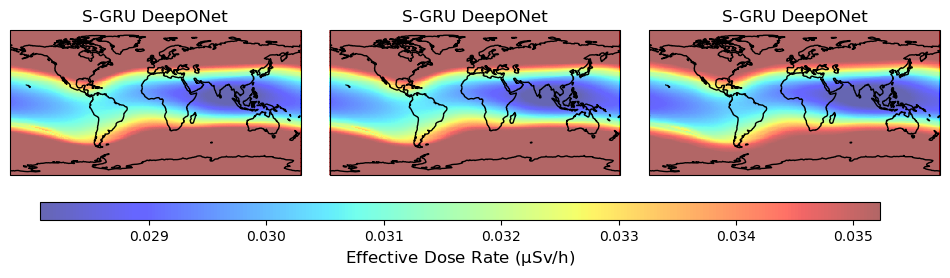

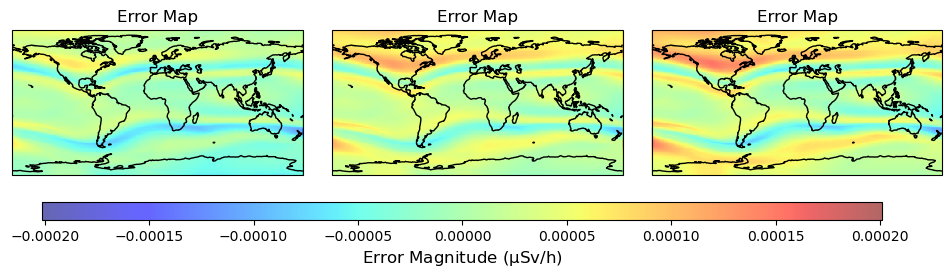

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap

# Create a "lighter" version of the jet colormap
jet_cmap = plt.cm.jet
jet_cmap_alpha = jet_cmap(np.arange(jet_cmap.N))
jet_cmap_alpha[:, -1] = 0.6  # Adjust transparency
jet = ListedColormap(jet_cmap_alpha)

# Define colorbar limits (Ensure same range for all maps)
diff_min, diff_max = -np.max(abs(preds_2d - targets_2d)), np.max(abs(preds_2d - targets_2d))

fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
plt.subplots_adjust(wspace=0.1, hspace=0.2)  # Reduce space between subplots

# Store the last colormap object for colorbar reference
im_pred, im_error = None, None

# Loop through the three selected samples (best, 90th percentile, worst)
for i in range(3):

    ax = axes[i]
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle='')
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

    data = preds_2d[idxs[i]][2]
    vmin_, vmax_ = vmin, vmax
    title = f'S-GRU DeepONet'
    im_pred = ax.pcolormesh(preds_2d[idxs[i]][0], preds_2d[idxs[i]][1], data,
                                cmap=jet, vmin=vmin, vmax=vmax)

    ax.set_title(title, fontsize=12)

cbar_ax = fig.add_axes([0.15, 0.3, 0.70, 0.03])  # x, y, width, height
cbar = fig.colorbar(im_pred, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r"Effective Dose Rate ($\rm \mu Sv/h$)", fontsize=12)

# save
plt.savefig(file_f, dpi=300, bbox_inches='tight')
plt.show()

# error maps
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
plt.subplots_adjust(wspace=0.1, hspace=0.2)  # Reduce space between subplots

# Store the last colormap object for colorbar reference
im_pred, im_error = None, None
# Loop through the three selected samples (best, 90th percentile, worst)
for i in range(3):

    ax = axes[i]
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle='')
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

    data = preds_2d[idxs[i]][2] - targets_2d[idxs[i]][2]
    vmin_, vmax_ = diff_min, diff_max
    title = f'Error Map'
    im_error = ax.pcolormesh(preds_2d[idxs[i]][0], preds_2d[idxs[i]][1], data,
                                cmap=jet, vmin=vmin_, vmax=vmax_)
    
    ax.set_title(title, fontsize=12)
    
cbar_ax = fig.add_axes([0.15, 0.3, 0.70, 0.03])  # x, y, width, height
cbar = fig.colorbar(im_error, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r"Error Magnitude ($\rm \mu Sv/h$)", fontsize=12)

# save
plt.savefig(file_e, dpi=300, bbox_inches='tight')
plt.show()